## Generate random data first

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
X = np.random.normal(size=200)

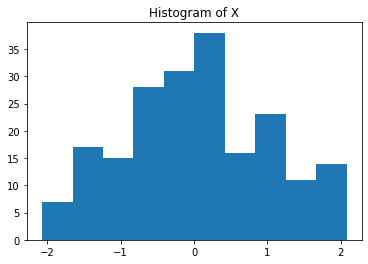

In [84]:
plt.hist(X)
plt.title('Histogram of X');

## Algorithm 1: Generate from kernel density

In [4]:
from statsmodels.nonparametric import kde,bandwidths

In [6]:
np.random.choice(X, size=10)

array([6.50663638, 3.41188798, 1.19504759, 1.16502046, 5.99896794,
       3.67359891, 5.83985411, 6.50663638, 1.52708617, 0.8935382 ])

In [53]:
k1 = kde.KDEUnivariate(X)

In [65]:
k1.fit(kernel="epa", fft=False, bw="scott")

In [66]:
bw_used = bandwidths.bw_scott(X)

In [7]:
def rand_bartlett(size=(1,10)):
    rvs_needed = np.array(size).prod()
    rvs_generated = 0
    out = np.empty(0)
    
    while rvs_generated < rvs_needed:
        X = np.random.uniform(-1.0, 1.0, size=round(rvs_needed*1.5, None))
        U = np.random.uniform(0.0, 1.0, size = X.shape)
        out = np.hstack((out, X[U <= 1 - X**2]))
        
        rvs_generated = out.size
        
    return out[:rvs_needed].reshape(size)   

In [79]:
def rand_from_density(X, size=(1,10), lower=-np.inf, upper=np.inf, batch_size=100):
    rvs_needed = np.array(size).prod()
    bw0 = bandwidths.bw_scott(X)
    
    if (lower is not -np.inf) or (upper is not np.inf):
        rvs_generated = 0
        out = np.empty(0)
        
        while rvs_generated < rvs_needed:
            Y0 = np.random.choice(X, size=batch_size) + rand_bartlett(batch_size)*bw0
            out = np.hstack((out, Y0[np.column_stack((Y0 >= lower,  Y0 <= upper)).all(axis=1)])) 
            rvs_generated = out.size
        
        out = out[:rvs_needed].reshape(size)
    else:
        out = np.random.choice(X, size=rvs_needed) + rand_bartlett(rvs_needed)*bw0

    
    return out

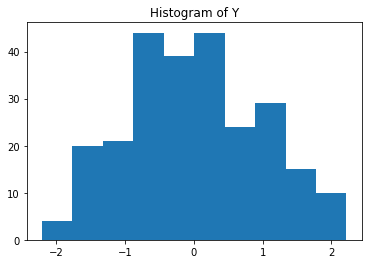

In [89]:
Y = rand_from_density(X, size=250)
plt.hist(Y)
plt.title('Histogram of Y');

In [10]:
BB = rand_bartlett(size=1000)

In [13]:
BB.shape[0]

1000

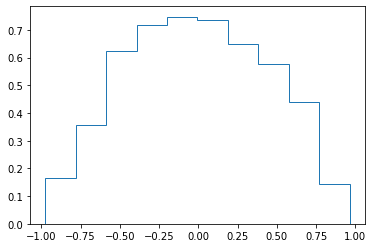

In [75]:
plt.hist(BB, density=True, histtype='step' );

In [66]:
tmp.reshape((2,5))

array([[-0.55343223,  0.59036993,  0.95141438,  0.07449957, -0.6755122 ],
       [ 0.0816377 , -0.57970599,  0.20499574, -0.05025981,  0.3173002 ]])

In [55]:
np.empty(0).size

0

In [25]:
tmp = (1,10)
np.array(tmp).prod()

10

In [5]:
d = np.random.rand(6,5,4)

In [8]:
d.size

120

In [13]:
np.random.chisquare?

Docstring:
chisquare(df, size=None)

Draw samples from a chi-square distribution.

When `df` independent random variables, each with standard normal
distributions (mean 0, variance 1), are squared and summed, the
resulting distribution is chi-square (see Notes).  This distribution
is often used in hypothesis testing.

.. note::
    New code should use the ``chisquare`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
df : float or array_like of floats
     Number of degrees of freedom, must be > 0.
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  If size is ``None`` (default),
    a single value is returned if ``df`` is a scalar.  Otherwise,
    ``np.array(df).size`` samples are drawn.

Returns
-------
out : ndarray or scalar
    Drawn samples from the parameterized chi-square distribution.

Raises
------
ValueError
    When 